In [1]:
import pandas as pd
import torch
from LSTMPredict import LSTMPredict
from modules import LSTM_Model
import pickle
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt
import os

In [2]:
symbol = "ACB"

In [3]:
csv_file_path = f'D:\KLTN\RLServer\LSTMCSV\{symbol}.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path)

In [61]:
model = LSTM_Model(input_size = 20,output_size = 1)
model.to(device)
model.load_state_dict(torch.load(f"checkpoint/{symbol}_forecast_model.pt", map_location=torch.device('cpu')))
x_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTM_xscaler.pkl", 'rb'))
y_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTM_yscaler.pkl", 'rb'))
result = LSTMPredict(data,x_scaler,y_scaler,model)

c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\KLTN\RLServer\LSTMPredict.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_row['Date']= update_row['Date'] + timedelta(days=1)
d:\KLTN\RLServer\LSTMPredict.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

2595 Date        2024-06-14 00:00:00
Close                   30550.0
Open                    31550.0
High                    31900.0
Low                     30300.0
forecast                    NaN
signal                      NaN
Name: 2595, dtype: object
2596 {'Date': Timestamp('2024-06-15 00:00:00'), 'forecast': 29091.56}
2597 {'Date': Timestamp('2024-06-16 00:00:00'), 'forecast': 30664.758}
2598 {'Date': Timestamp('2024-06-17 00:00:00'), 'forecast': 30173.08}
2599 {'Date': Timestamp('2024-06-18 00:00:00'), 'forecast': 30502.201}
2600 {'Date': Timestamp('2024-06-19 00:00:00'), 'forecast': 30353.023}
2601 {'Date': Timestamp('2024-06-20 00:00:00'), 'forecast': 30379.117}
2602 {'Date': Timestamp('2024-06-21 00:00:00'), 'forecast': 30907.855}
2603 {'Date': Timestamp('2024-06-22 00:00:00'), 'forecast': 32084.78}
2604 {'Date': Timestamp('2024-06-23 00:00:00'), 'forecast': 32213.848}
2605 {'Date': Timestamp('2024-06-24 00:00:00'), 'forecast': 32808.83}
2606 {'Date': Timestamp('2024-06-25 00:

In [62]:
result['Close'] = result['Close'].fillna(result['forecast'])

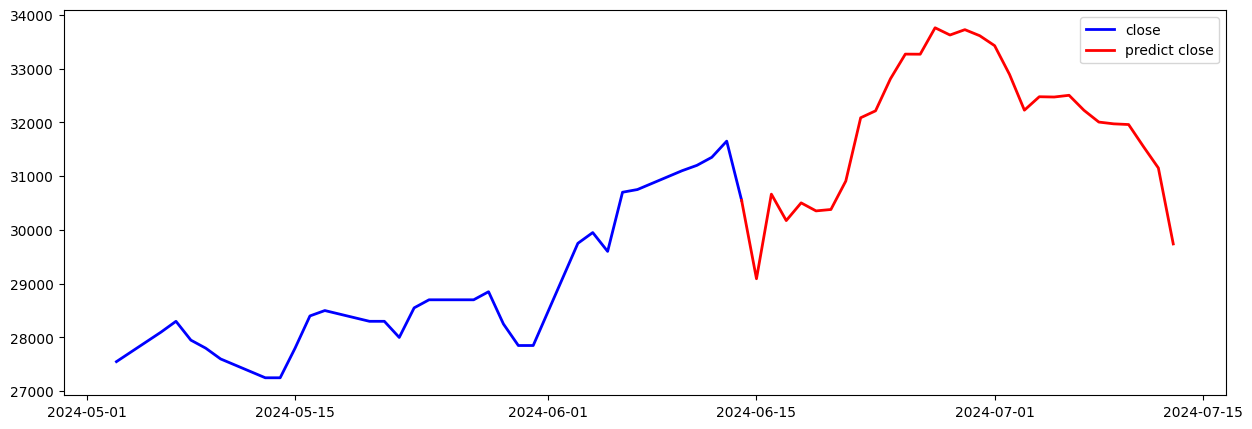

In [63]:
fig = plt.figure(figsize = (15, 5))
# Vẽ 60 ngày cuối cùng
plt.plot(result['Date'].iloc[-60:-29], result['Close'].iloc[-60:-29], color='blue', lw=2, label='close')

# Vẽ 30 ngày cuối cùng với màu khác
plt.plot(result['Date'].iloc[-30:], result['Close'].iloc[-30:], color='red', lw=2, label='predict close')
plt.legend()
plt.show()

In [64]:
result = result.drop(columns=['forecast', 'signal'], errors='ignore')
output_directory = "LSTMCSV"
output_file_path = os.path.join(output_directory, f'{symbol}predictions.csv')
result.to_csv(output_file_path, index=False)